🔍 Searching NCBI Protein Database for:
Carp edema virus 4a protein (P4a) gene, partial cds
✅ Protein ID Found: 2247521569

📄 GenBank Record (Truncated):

LOCUS       URN82085                 150 aa            linear   VRL 10-JUN-2022
DEFINITION  4a, partial [Carp edema virus].
ACCESSION   URN82085
VERSION     URN82085.1
DBSOURCE    accession MW915530.1
KEYWORDS    .
SOURCE      Carp edema virus
  ORGANISM  Carp edema virus
            Viruses; Varidnaviria; Bamfordvirae; Nucleocytoviricota;
            Pokkesviricetes; Chitovirales; Poxviridae.
REFERENCE   1  (residues 1 to 150)
  AUTHORS   Ziafati Kafi,Z., Najafi,H., Alishahi,M., Rahmati-Holasoo,H.,
            Mouloki,A. and Ghalyanchilangeroudi,A.
  TITLE     Detection and phylogenetic analysis of carp edema virus in common
            carp (Cyprinus Carpio) in Iran; 2020-2021
  JOURNAL   Aquaculture 558, 738381 (2022)
REFERENCE   2  (residues 1 to 150)
  AUTHORS   Ziafati Kafi,Z., Ghalyanchi Langeroudi,A., Najafi,H., Alishahi,M.,
 

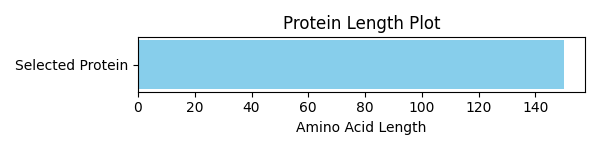

In [ ]:
#@markdown
# Step 1: Install required packages (run this cell first in Colab)
!pip install ipywidgets biopython fpdf matplotlib --quiet

# Step 2: Main Application Code
from IPython.display import display, Image, clear_output
import ipywidgets as widgets
from Bio import Entrez, SeqIO
import matplotlib.pyplot as plt
from fpdf import FPDF
from google.colab import files
import os

# Configure Entrez email
Entrez.email = "your_email@example.com"  # Replace with your actual email

# Prepare output directory
output_dir = "NCBI_Carp_Protein_Output"
os.makedirs(output_dir, exist_ok=True)

# Dropdown options
fish_species = [
    "Common Carp (Cyprinus carpio)", "Grass Carp (Ctenopharyngodon idella)",
    "Silver Carp (Hypophthalmichthys molitrix)", "Catla carp (Cyprinus catla)",
    "Bighead Carp (Hypophthalmichthys nobilis)"
]

fish_organs = ["Gill", "Kidney", "Liver", "Spleen", "Heart", "Intestine"]
genes = ["p4a", "vp8", "ORF16", "CyHV1", "CEV_F1", "CEV_R1", "CEV_F2"]
diseases = ["Carp Edema Virus", "koi herpesvirus", "cyprinid herpesvirus-2"]
protein_list = [
    "Carp edema virus isolate Agnes_661xx2018 P4a core protein (p4a) gene, partial cds",
    "Carp edema virus isolate IR-UT-ZGNARM 40020 4a (p4a) gene, partial cds",
    "Carp edema virus isolate IR-UT-ZGNARM 9360 4a (p4a) gene, partial cds",
    "Carp edema virus isolate IR UT-ZGNARM 9429 4a (p4a) gene, partial cds",
    "Carp edema virus isolate IR-UT-ZGNARM 9171 4a (p4a) gene, partial cds",
    "Carp edema virus isolate IR-UT-ZGNARM 9325 4a (p4a) gene, partial cds",
    "Carp edema virus isolate IR-UT-ZGNARM 9299 4a (p4a) gene, partial cds",
    "Carp edema virus 4a protein (P4a) gene, partial cds",
    "Carp edema virus isolate F238 4a protein (P4a) gene, partial cds",
    "Carp edema virus isolate LE2 4a protein (P4a) gene, partial cds",
    "Carp edema virus isolate LE1 4a protein (P4a) gene, partial cds",
    "Carp edema virus isolate F129 4a protein (P4a) gene, partial cds",
    "Carp edema virus isolate F14 4a protein (P4a) gene, partial cds"
]

# Widgets
species_dropdown = widgets.Dropdown(options=fish_species, description="Species:")
organ_dropdown = widgets.Dropdown(options=fish_organs, description="Organ:")
gene_dropdown = widgets.Dropdown(options=genes, description="Gene:")
disease_dropdown = widgets.Dropdown(options=diseases, description="Disease:")
protein_dropdown = widgets.Dropdown(options=protein_list, description="Protein:")
show_text = widgets.Checkbox(value=True, description='Show GenBank Record')
show_image = widgets.Checkbox(value=True, description='Show Image Plot')
download_text = widgets.Checkbox(value=True, description='Download GenBank File')
download_image = widgets.Checkbox(value=True, description='Download Image File')
download_pdf = widgets.Checkbox(value=True, description='Download PDF Report')
search_button = widgets.Button(description="🔍 Search Protein")

# Display interface
display(widgets.VBox([
    widgets.Label("Select Details for Protein Search"),
    species_dropdown,
    organ_dropdown,
    gene_dropdown,
    disease_dropdown,
    protein_dropdown,
    show_text, show_image,
    download_text, download_image, download_pdf,
    search_button
]))

def search_protein(b):
    clear_output(wait=True)
    display(widgets.VBox([
        widgets.Label("Select Details for Protein Search"),
        species_dropdown,
        organ_dropdown,
        gene_dropdown,
        disease_dropdown,
        protein_dropdown,
        show_text, show_image,
        download_text, download_image, download_pdf,
        search_button
    ]))

    if species_dropdown.value != "Common Carp (Cyprinus carpio)" or organ_dropdown.value != "Gill" or gene_dropdown.value != "p4a" or disease_dropdown.value != "Carp Edema Virus":
        print("⚠️ Please match: Common Carp, Gill, p4a, Carp Edema Virus to run the protein search.")
        return

    search_term = protein_dropdown.value
    print(f"🔍 Searching NCBI Protein Database for:\n{search_term}")

    handle = Entrez.esearch(db="protein", term=search_term, retmax=1)
    result = Entrez.read(handle)
    handle.close()

    if not result['IdList']:
        print("❌ No matching protein record found.")
        return

    protein_id = result['IdList'][0]
    print(f"✅ Protein ID Found: {protein_id}")

    handle = Entrez.efetch(db="protein", id=protein_id, rettype="gb", retmode="text")
    protein_text = handle.read()
    handle.close()

    genbank_path = os.path.join(output_dir, "selected_protein.txt")
    with open(genbank_path, "w") as f:
        f.write(protein_text)

    seq_record = SeqIO.read(Entrez.efetch(db="protein", id=protein_id, rettype="gb", retmode="text"), "genbank")
    seq_len = len(seq_record.seq)

    img_path = os.path.join(output_dir, "protein_length_plot.png")
    plt.figure(figsize=(6, 1.5))
    plt.barh(["Selected Protein"], [seq_len], color='skyblue')
    plt.xlabel("Amino Acid Length")
    plt.title("Protein Length Plot")
    plt.tight_layout()
    plt.savefig(img_path)
    plt.close()

    if show_text.value:
        print("\n📄 GenBank Record (Truncated):\n")
        print(protein_text[:1200] + "\n...[truncated]...")

    if show_image.value:
        print("🖼 Visualizing Sequence Length:")
        display(Image(img_path))

    if download_text.value:
        files.download(genbank_path)

    if download_image.value:
        files.download(img_path)

    if download_pdf.value:
        pdf_path = os.path.join(output_dir, "protein_report.pdf")
        pdf = FPDF()
        pdf.add_page()
        pdf.set_font("Arial", "B", 14)
        pdf.cell(200, 10, "Selected Protein Report", ln=True)
        pdf.set_font("Arial", size=10)
        pdf.multi_cell(0, 5, protein_text[:2500] + "\n...[truncated]...")
        pdf.image(img_path, w=180)
        pdf.output(pdf_path)
        files.download(pdf_path)

search_button.on_click(search_protein)
